# Boxing Bout Data
Dataset obtained from [Kaggle](https://www.kaggle.com/slonsky/boxing-bouts), which in turn was scraped from boxing bout records maintained by [BoxRec](http://boxrec.com/en/).


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Pandas options set-up
pd.set_option("display.max_columns", 50)

In [2]:
# Load dataset
bouts = pd.read_csv("bouts_out_new.csv")
bouts.head(10)

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,37,49,0,1,0,1,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,48,50,1,2,1,1,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,23,47,0,1,1,1,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,46,31,1,3,1,0,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,45,40,1,4,1,0,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0
5,24.0,31.0,175.0,175.0,179.0,178.0,orthodox,orthodox,NaN,NaN,44,32,1,1,1,0,31,28.0,win_A,KO,NaN,NaN,NaN,NaN,NaN,NaN
6,23.0,31.0,175.0,175.0,179.0,188.0,orthodox,orthodox,155.0,155.0,43,19,1,1,1,2,31,12.0,win_A,SD,115.0,113.0,117.0,111.0,113.0,115.0
7,23.0,31.0,175.0,177.0,179.0,175.0,orthodox,orthodox,155.0,NaN,42,22,1,3,1,0,30,18.0,win_A,TKO,89.0,82.0,88.0,83.0,89.0,82.0
8,36.0,23.0,173.0,175.0,183.0,179.0,orthodox,orthodox,152.0,NaN,44,42,0,0,0,1,26,30.0,win_A,MD,116.0,112.0,114.0,114.0,117.0,111.0
9,27.0,22.0,177.0,175.0,183.0,179.0,southpaw,southpaw,NaN,NaN,26,41,0,0,0,1,14,30.0,win_B,UD,112.0,115.0,109.0,118.0,111.0,116.0


In [4]:
bouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387427 entries, 0 to 387426
Data columns (total 26 columns):
age_A       352888 non-null float64
age_B       257935 non-null float64
height_A    249246 non-null float64
height_B    134640 non-null float64
reach_A     112342 non-null float64
reach_B     37873 non-null float64
stance_A    231009 non-null object
stance_B    231009 non-null object
weight_A    135573 non-null float64
weight_B    130358 non-null float64
won_A       387427 non-null int64
won_B       387427 non-null int64
lost_A      387427 non-null int64
lost_B      387427 non-null int64
drawn_A     387427 non-null int64
drawn_B     387427 non-null int64
kos_A       387427 non-null int64
kos_B       387348 non-null float64
result      387427 non-null object
decision    387427 non-null object
judge1_A    52248 non-null float64
judge1_B    52060 non-null float64
judge2_A    70371 non-null float64
judge2_B    70032 non-null float64
judge3_A    61231 non-null float64
judge3_B    6

In [7]:
bouts.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2853 entries, 0 to 387138
Data columns (total 26 columns):
age_A       2853 non-null float64
age_B       2853 non-null float64
height_A    2853 non-null float64
height_B    2853 non-null float64
reach_A     2853 non-null float64
reach_B     2853 non-null float64
stance_A    2853 non-null object
stance_B    2853 non-null object
weight_A    2853 non-null float64
weight_B    2853 non-null float64
won_A       2853 non-null int64
won_B       2853 non-null int64
lost_A      2853 non-null int64
lost_B      2853 non-null int64
drawn_A     2853 non-null int64
drawn_B     2853 non-null int64
kos_A       2853 non-null int64
kos_B       2853 non-null float64
result      2853 non-null object
decision    2853 non-null object
judge1_A    2853 non-null float64
judge1_B    2853 non-null float64
judge2_A    2853 non-null float64
judge2_B    2853 non-null float64
judge3_A    2853 non-null float64
judge3_B    2853 non-null float64
dtypes: float64(15), int6

In [8]:
bouts.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age_A,352888.0,24.416041,6.523590,-74.0,21.0,24.0,27.0,1818.0
age_B,257935.0,26.583345,11.823224,-74.0,23.0,26.0,30.0,2016.0
height_A,249246.0,172.786657,9.130127,2.0,166.0,173.0,178.0,255.0
height_B,134640.0,172.882657,9.430631,15.0,167.0,173.0,179.0,255.0
reach_A,112342.0,178.848605,12.002404,5.0,170.0,178.0,185.0,456.0
reach_B,37873.0,179.001030,14.867537,1.0,171.0,178.0,185.0,456.0
weight_A,135573.0,146.340636,30.240142,10.0,125.0,140.0,160.0,363.0
weight_B,130358.0,147.089484,30.624890,2.0,126.0,140.0,160.0,450.0
won_A,387427.0,23.108438,27.629901,0.0,5.0,14.0,31.0,332.0
won_B,387427.0,15.159080,19.938137,0.0,2.0,8.0,21.0,251.0


In [9]:
# Remove observations with non-sensical data for age, height, weight, and reach.
bouts = bouts[(bouts["age_A"] >= 16) & (bouts["age_B"] >= 16)]
bouts = bouts[(bouts["age_A"] <= 60) & (bouts["age_B"] <= 60)]
bouts = bouts[(bouts["height_A"] >= 120) & (bouts["height_B"] >= 120)]
bouts = bouts[(bouts["weight_A"] >= 100) & (bouts["weight_B"] >= 100)]
bouts = bouts[(bouts["reach_A"] >= 120) & (bouts["reach_B"] >= 120)]
bouts = bouts[(bouts["reach_A"] <= 250) & (bouts["reach_B"] <= 250)]

In [10]:
bouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7660 entries, 0 to 387151
Data columns (total 26 columns):
age_A       7660 non-null float64
age_B       7660 non-null float64
height_A    7660 non-null float64
height_B    7660 non-null float64
reach_A     7660 non-null float64
reach_B     7660 non-null float64
stance_A    7123 non-null object
stance_B    7123 non-null object
weight_A    7660 non-null float64
weight_B    7660 non-null float64
won_A       7660 non-null int64
won_B       7660 non-null int64
lost_A      7660 non-null int64
lost_B      7660 non-null int64
drawn_A     7660 non-null int64
drawn_B     7660 non-null int64
kos_A       7660 non-null int64
kos_B       7660 non-null float64
result      7660 non-null object
decision    7660 non-null object
judge1_A    2966 non-null float64
judge1_B    2961 non-null float64
judge2_A    3259 non-null float64
judge2_B    3250 non-null float64
judge3_A    3228 non-null float64
judge3_B    3227 non-null float64
dtypes: float64(15), int6

In [11]:
bouts.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age_A,7660.0,26.800000,5.196838,16.0,23.0,26.0,30.0,54.0
age_B,7660.0,28.247389,5.262185,16.0,24.0,28.0,32.0,51.0
height_A,7660.0,175.925587,9.450081,148.0,170.0,175.0,183.0,213.0
height_B,7660.0,175.182115,9.262750,150.0,168.0,175.0,181.0,216.0
reach_A,7660.0,181.385248,11.986403,150.0,173.0,180.0,188.0,224.0
reach_B,7660.0,180.550783,11.905431,142.0,173.0,180.0,188.0,229.0
weight_A,7660.0,156.877676,37.901230,104.0,130.0,147.0,174.0,319.0
weight_B,7660.0,157.375979,38.444795,103.0,130.0,147.0,175.0,334.0
won_A,7660.0,31.082637,29.558550,0.0,14.0,24.0,37.0,258.0
won_B,7660.0,28.183159,24.201331,0.0,14.0,23.0,35.0,223.0


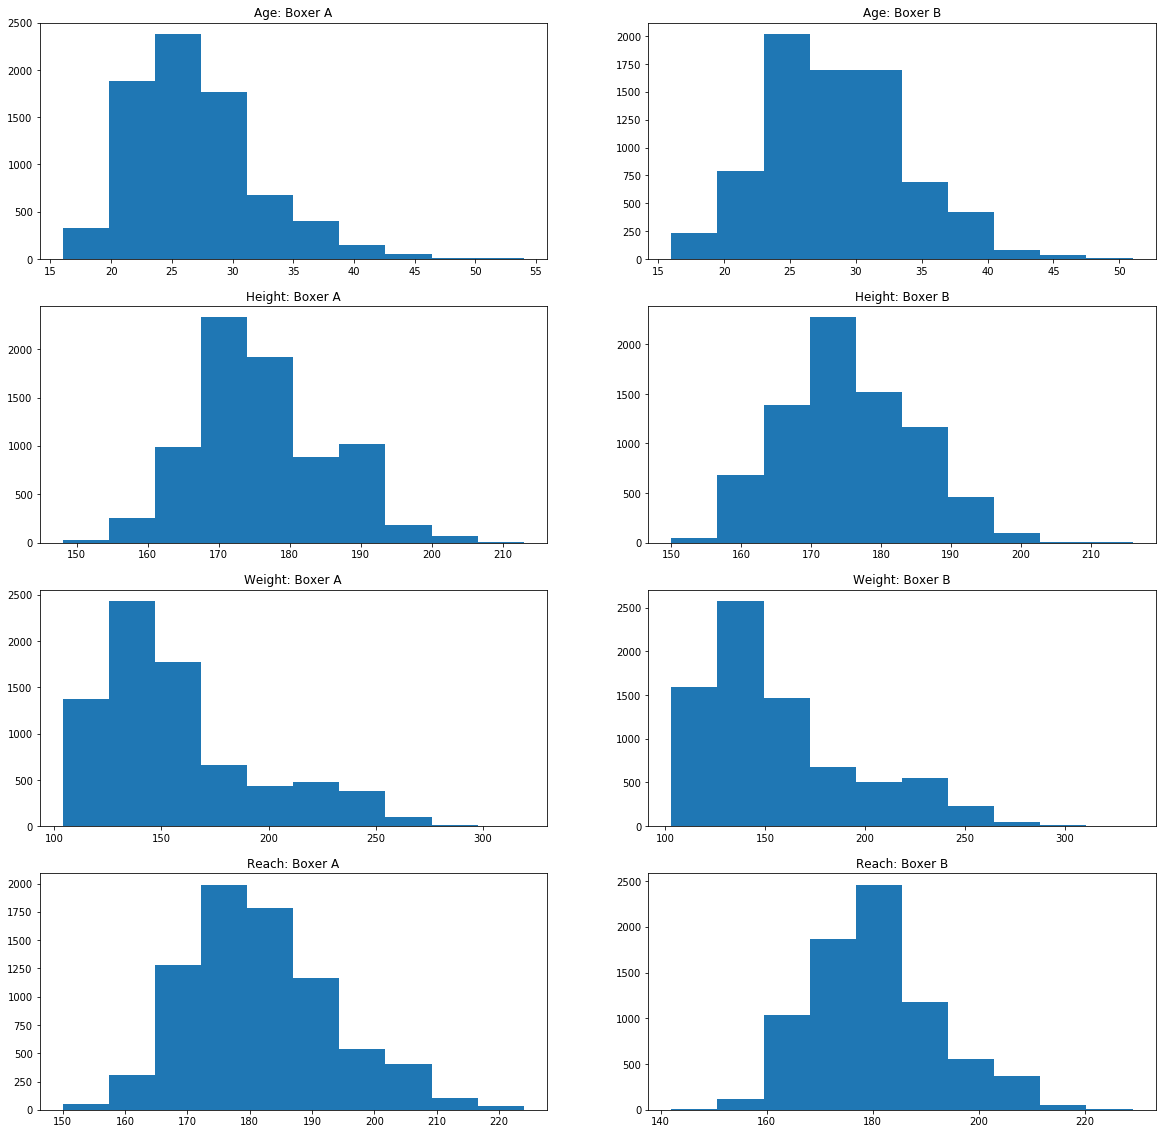

In [12]:
plt.figure(figsize=(20, 20))

plt.subplot(4, 2, 1)
plt.hist(bouts["age_A"])
plt.title("Age: Boxer A")

plt.subplot(4, 2, 2)
plt.hist(bouts["age_B"])
plt.title("Age: Boxer B")

plt.subplot(4, 2, 3)
plt.hist(bouts["height_A"])
plt.title("Height: Boxer A")

plt.subplot(4, 2, 4)
plt.hist(bouts["height_B"])
plt.title("Height: Boxer B")

plt.subplot(4, 2, 5)
plt.hist(bouts["weight_A"])
plt.title("Weight: Boxer A")

plt.subplot(4, 2, 6)
plt.hist(bouts["weight_B"])
plt.title("Weight: Boxer B")

plt.subplot(4, 2, 7)
plt.hist(bouts["reach_A"])
plt.title("Reach: Boxer A")

plt.subplot(4, 2, 8)
plt.hist(bouts["reach_B"])
plt.title("Reach: Boxer B")

plt.show()

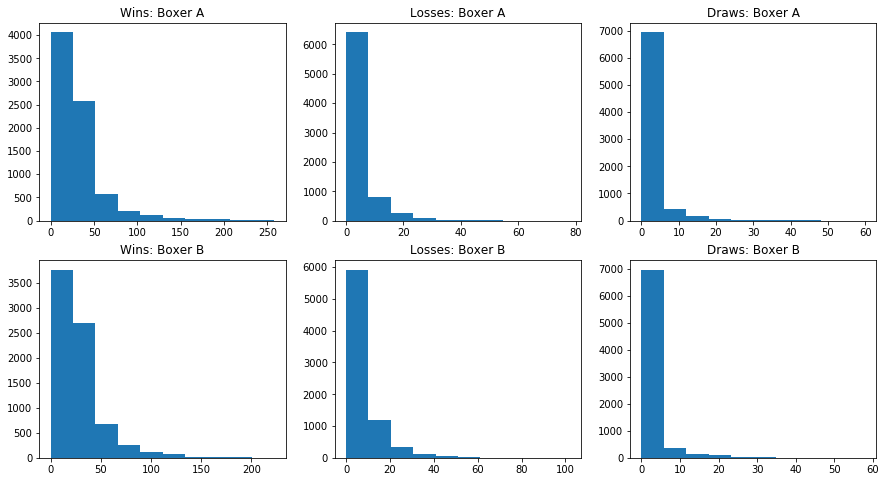

In [13]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.hist(bouts["won_A"])
plt.title("Wins: Boxer A")

plt.subplot(2, 3, 2)
plt.hist(bouts["lost_A"])
plt.title("Losses: Boxer A")

plt.subplot(2, 3, 3)
plt.hist(bouts["drawn_A"])
plt.title("Draws: Boxer A")

plt.subplot(2, 3, 4)
plt.hist(bouts["won_B"])
plt.title("Wins: Boxer B")

plt.subplot(2, 3, 5)
plt.hist(bouts["lost_B"])
plt.title("Losses: Boxer B")

plt.subplot(2, 3, 6)
plt.hist(bouts["drawn_B"])
plt.title("Draws: Boxer B")

plt.show()

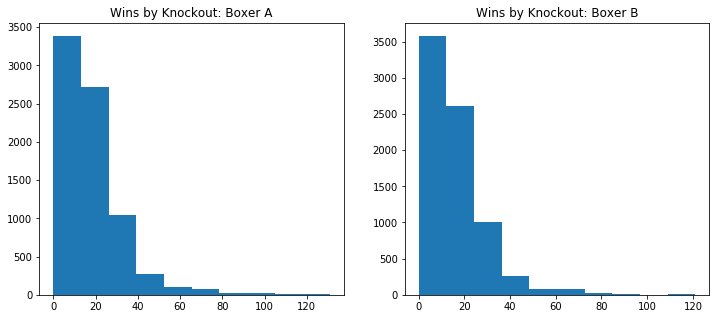

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1 ,2 ,1)
plt.hist(bouts["kos_A"])
plt.title("Wins by Knockout: Boxer A")

plt.subplot(1 ,2 ,2)
plt.hist(bouts["kos_B"])
plt.title("Wins by Knockout: Boxer B")

plt.show()

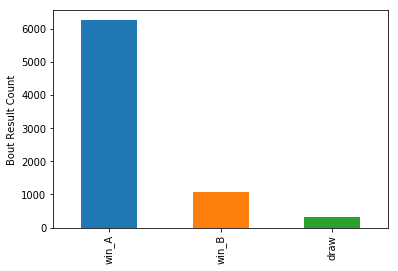

In [15]:
bouts["result"].value_counts().plot(kind='bar')
plt.ylabel('Bout Result Count')
plt.show()

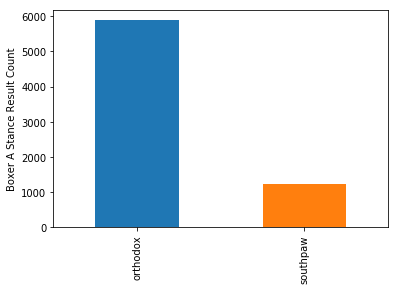

In [16]:
bouts["stance_A"].value_counts().plot(kind='bar')
plt.ylabel('Boxer A Stance Result Count')
plt.show()

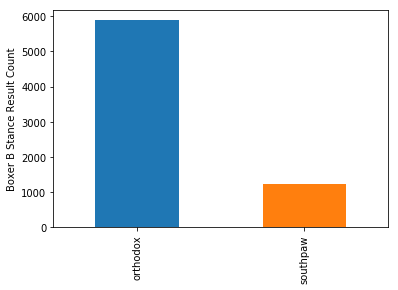

In [17]:
bouts["stance_B"].value_counts().plot(kind='bar')
plt.ylabel('Boxer B Stance Result Count')
plt.show()

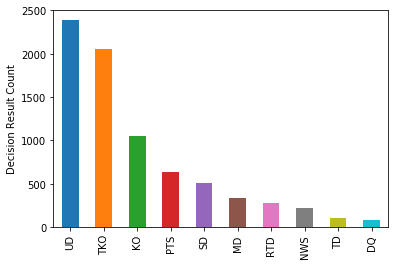

In [18]:
bouts["decision"].value_counts().plot(kind='bar')
plt.ylabel('Decision Result Count')
plt.show()